In [7]:
# Basado en Ejemplo de Manuel Ferreira

In [8]:
# Cargar librerias
import numpy as np
import pandas_datareader as pdr
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [9]:
# Definir parametros

# Símbolos a analizar
tickers = ['IBM','AAPL','GOOG']

# Períodos a analizar
periods = ['10y','1y','90d','30d','10d']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

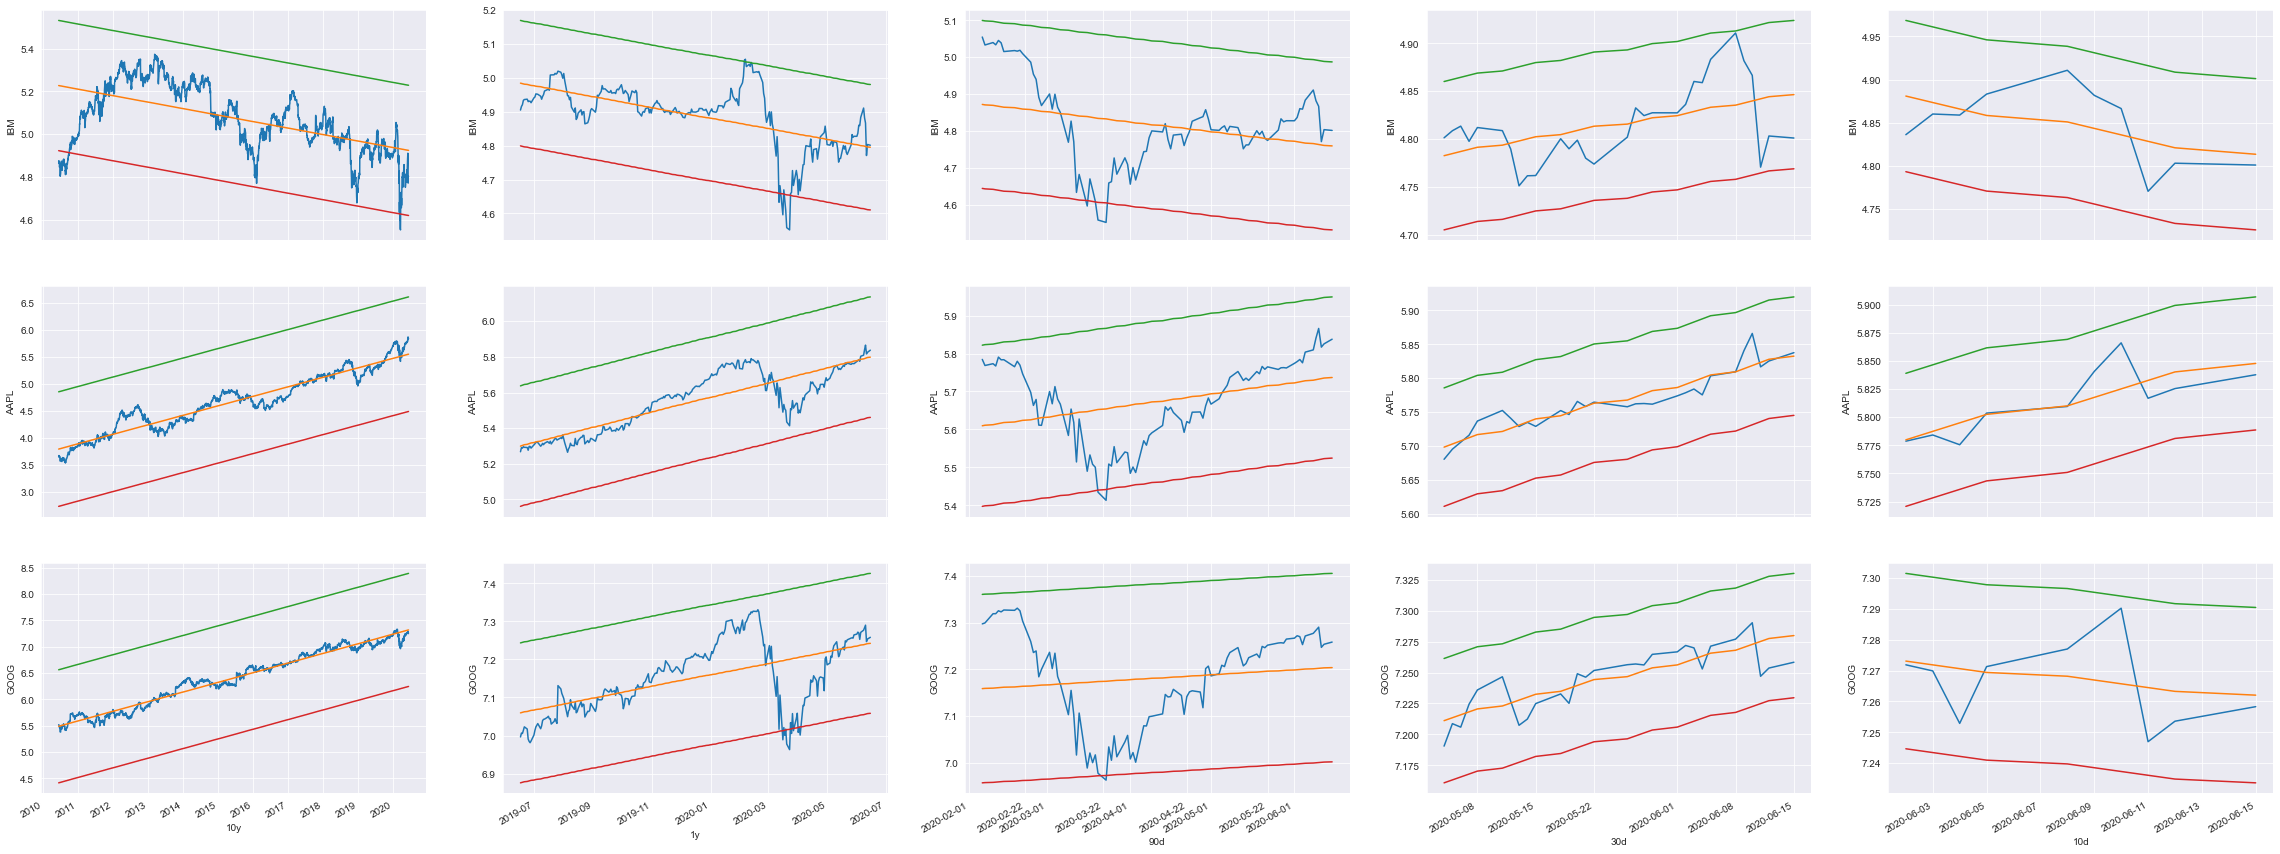

In [10]:
# Set up the matplotlib figure
f, axes = plt.subplots(len(tickers), len(periods), figsize=(40, 16))
f.autofmt_xdate()
sns.set_style("darkgrid")

for ticker in tickers: # para cada ticker
    for period in periods: # para cada período
        x = tickers.index(ticker)
        y = periods.index(period)
    
        # Descargar datos y depurar
        data = yf.download(ticker, period=period)
        data = data[data['Volume']>0]
        data = data.drop(['Adj Close'], axis=1)
        
        # Transformar a escala logarítmica
        datalog = np.log(data)

        # Calcular tendencias
        datalog['Regresion'] = sm.OLS(datalog['Close'],sm.add_constant(range(len(datalog.index)),prepend=True)).fit().fittedvalues
        deviation = datalog.Close.std()
        datalog['Bottom'] = datalog.Regresion - deviation * 2
        datalog['Top'] = datalog.Regresion + deviation * 2

        # Desplegar charts
        sns.lineplot(datalog.index, datalog.Close, ax=axes[x,y])
        sns.lineplot(datalog.index, datalog.Regresion, ax=axes[x,y])
        sns.lineplot(datalog.index, datalog.Top, ax=axes[x,y])
        sns.lineplot(datalog.index, datalog.Bottom, ax=axes[x,y])

        # Configurar labels de los charts
        axes[x,y].set_ylabel(ticker)
        axes[x,y].set_xlabel(period)
    
